# Single brain 3D Visualization

This notebook demonstrates how to visualize the cell density of each Region of Interest (ROI) in the mouse brain, utilizing data extracted in the preceding steps of the pipeline.

### Instructions

1. **Set Up Your Environment:**
   To run this notebook, you need to create a virtual environment with the required packages. Follow these steps to set up your environment:

   - **Create a Virtual Environment:**
     Use the following command to create a virtual environment from the provided [brainrender-env.yml](assets/yml/brainrender-env.yml) file:
     ```bash
     conda env create -f brainrender-env.yml
     ```

   - **Activate the Environment:**
     Once created, activate the environment using:
     ```bash
     conda activate brainrender-env
     ```

   - **Select the Kernel:**
     After activating the environment, choose it as the kernel for the notebook. This ensures that all dependencies are correctly resolved when you run the notebook.

In [1]:
import pandas as pd
import numpy as np
import glob
from brainrender import Scene
from brainrender.actors import Points
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from brainglobe_atlasapi import BrainGlobeAtlas
from brainglobe_atlasapi import show_atlases
import brainglobe_heatmap as bgh
from brainrender import Scene, actors, cameras, settings


# MANDATORY INPUTS
csv_file = "/run/user/1000/gvfs/smb-share:server=upcourtinenas,share=cervical/CERVICAL_ID/Connectome_analysis/Final_dataset/DR/Uninjured/602/_Measurements/whole_brain.csv"
image_dir = "" #folder where to save images
side = "Left" #right
n_roi_displayed = 20 #first most dense roi to display
verbose = True
normalize_color = True #If normilze the color of the rendering


# Prepare
Choose which region to plot (only the first most dense) and the relative color.

In [2]:
df = pd.read_csv(csv_file)

# Take the ROI only from one side
df = df[df["Side"] == side]

# Take only first most dense regions
df = df.sort_values(by='Cell Density', ascending=False)
df = df.iloc[:n_roi_displayed, :] #take first elements

# Create the dictionary --> NB take the name withounf left or right
cell_density_data = dict(zip(df['Region'], df['Cell Density']))
#cell_density_data = {"VISp": 50,"CA1": 30,"M1": 65,"S1": 90,"SCop":100}


if normalize_color:
    # Normalize cell density values to range [0, 1]
    def normalize(value, min_value, max_value):
        return (value - min_value) / (max_value - min_value)
    min_density = min(cell_density_data.values())
    max_density = max(cell_density_data.values())
    normalized_densities = {region: normalize(density, min_density, max_density) for region, density in cell_density_data.items()}

    # Create a colormap using matplotlib
    cmap = plt.get_cmap('Reds')  # You can choose other colormaps like 'plasma', 'inferno', etc.
    norm = mcolors.Normalize(vmin=0, vmax=1)

    # Map normalized densities to colors
    colors = {region: mcolors.to_hex(cmap(norm(density))) for region, density in normalized_densities.items()}
else:
    color = cell_density_data

print(colors)

# Colors in rgb triplets
rgb_colors = {region: mcolors.to_rgb(cmap(norm(density))) for region, density in normalized_densities.items()}

print(rgb_colors)


{'LDT': '#67000d', 'DR': '#e43027', 'IF': '#e63328', 'MMd': '#ea362a', 'PN': '#f44f39', 'SG': '#f44f39', 'PCG': '#fa6648', 'VI': '#fb7656', 'IPL': '#fb7c5c', 'AT': '#fc8666', 'IPDL': '#fc9d7f', 'VTN': '#fca183', 'pm': '#fca285', 'IPRL': '#fcaa8d', 'IPA': '#fcbda4', 'RM': '#fee5d9', 'IV': '#fee5d9', 'VTA': '#feeae1', 'PDTg': '#fff3ed', 'IPDM': '#fff5f0'}
{'LDT': (0.403921568627451, 0.0, 0.05098039215686274), 'DR': (0.8946251441753171, 0.18992695117262592, 0.15478662053056516), 'IF': (0.9034832756632064, 0.19853902345251828, 0.15847750865051902), 'MMd': (0.9167704728950405, 0.21145713187235693, 0.16401384083044987), 'PN': (0.9570011534025374, 0.3087120338331411, 0.22191464821222606), 'SG': (0.9570011534025374, 0.3087120338331411, 0.22191464821222606), 'PCG': (0.9806228373702421, 0.40123029603998467, 0.2809688581314879), 'VI': (0.9854825067281815, 0.46243752402921956, 0.3369473279507882), 'IPL': (0.9860976547481738, 0.48704344482891193, 0.3615532487504806), 'AT': (0.9870818915801615, 0.52

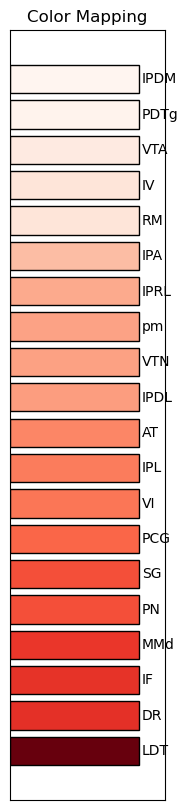

In [3]:
# Plot the colors
fig, ax = plt.subplots(figsize=(2,10))  # Adjust the size as needed

# Create a list of color names and their corresponding colors
regions = list(rgb_colors.keys())
color_values = list(color for color in rgb_colors.values())

# Create a bar plot to show the colors
for i, (region, color) in enumerate(rgb_colors.items()):
    ax.barh(i, 1, color=color, edgecolor='black')
    ax.text(1.02, i, region, va='center', ha='left')

# Remove axes and labels for better visualization
ax.set_xlim(0, 1.2)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title('Color Mapping')

plt.show()

### Choose Atlas
Check here atlas available: [link](https://brainglobe.info/documentation/brainglobe-atlasapi/index.html)

In [4]:
# SHow all atlases supported by brainrender
#show_atlases()

# Select an atlas
bg_atlas = BrainGlobeAtlas("allen_mouse_50um", check_latest=False)

# Show atlas choosen
#print(bg_atlas)

# List all brain regions in the atlas
#print(bg_atlas.lookup_df)

## Visualize

### With only BrainRender - Only one Hemisphere

In [9]:
# Necessary for running in jupyternotebook
import vedo
vedo.settings.default_backend= 'vtk'

# Display the Allen Brain mouse atlas.
scene = Scene(atlas_name="allen_mouse_50um", title="Cells Density in differnt brain regions")

# Add each brain region with the corresponding color
for region, color in colors.items():
    scene.add_brain_region(region, alpha=0.7, color=color)

# Add label to the brain region
#scene.add_label(primary_visual, "Primary visual cortex")

# Display the figure.
scene.render()

Exception ignored in: <function Scene.__del__ at 0x7497059f08b0>
Traceback (most recent call last):
  File "/home/gabri/mambaforge/envs/brainrender-env/lib/python3.9/site-packages/brainrender/scene.py", line 102, in __del__
    self.close()
  File "/home/gabri/mambaforge/envs/brainrender-env/lib/python3.9/site-packages/brainrender/render.py", line 291, in close
    self.plotter.close()
AttributeError: 'NoneType' object has no attribute 'close'
Exception ignored in: <function Scene.__del__ at 0x7497059f08b0>
Traceback (most recent call last):
  File "/home/gabri/mambaforge/envs/brainrender-env/lib/python3.9/site-packages/brainrender/scene.py", line 102, in __del__
    self.close()
  File "/home/gabri/mambaforge/envs/brainrender-env/lib/python3.9/site-packages/brainrender/render.py", line 291, in close
    self.plotter.close()
AttributeError: 'NoneType' object has no attribute 'close'
Exception ignored in: <function Scene.__del__ at 0x7497059f08b0>
Traceback (most recent call last):
  Fi

### With Napari - Only one Hemisphere

In [8]:
from brainrender_napari.napari_atlas_representation import NapariAtlasRepresentation
from brainglobe_atlasapi import BrainGlobeAtlas
import napari


viewer = napari.Viewer()
viewer.dims.ndisplay = 3
# replace "mpin_zfish_1um" with atlas of interest below
napari_atlas = NapariAtlasRepresentation(bg_atlas, viewer)
napari_atlas.add_to_viewer()

# Change who is shown
layer = viewer.layers["allen_mouse_50um_annotation"]
layer.visible = False
layer = viewer.layers["allen_mouse_50um_reference"]
layer.visible = True


for region, color in rgb_colors.items(): #Attention: here colors are rgb

    if not (region in bg_atlas.lookup_df["acronym"].to_list()):
        print(f"Region {region} not present in the atlas.")
        continue

    print(f"Renderinf region {region}...")

    # Add region as mesh
    napari_atlas.add_structure_to_viewer(region)

    #Change name mesh just added (it is a layer in napari)
    viewer.layers[-1].name = region

    #Change color mesh
    surface_layer = viewer.layers[-1] # get the vertex layer
    n_vertices = len(surface_layer.vertex_colors) # find number of vertices in the surface layer
    surface_layer.vertex_colors = np.repeat([color], n_vertices, axis=0) # make the surface layer red (1, 0, 0)


napari.run()

ModuleNotFoundError: No module named 'napari'

# 2D HeatMap
Still Only one hemipshere

{'FRP1': 7.985825417491224e-05, 'FRP2/3': 0.0, 'FRP5': 0.0004267863179104, 'FRP6a': 0.0003858362099566, 'FRP6b': 0.0, 'MOp1': 0.0002431361251487, 'MOp2/3': 0.0002878156610567, 'MOp5': 0.0004922444734521, 'MOp6a': 0.000367527354137, 'MOp6b': 0.0002361728969295, 'MOs1': 0.0002422712178926, 'MOs2/3': 0.0002865209904295, 'MOs5': 0.0003708799920207, 'MOs6a': 0.0003854221443097, 'MOs6b': 0.0003450219088912, 'SSp-n1': 0.0002068326978973, 'SSp-n2/3': 0.0001872761770167, 'SSp-n4': 0.000172332783961, 'SSp-n5': 0.0003728015260947, 'SSp-n6a': 0.0001853795862586, 'SSp-n6b': 0.0001319927272007, 'SSp-bfd1': 0.0001565050256442, 'SSp-bfd2/3': 0.0001595094185775, 'SSp-bfd4': 0.0001780587111047, 'SSp-bfd5': 0.0003124492599077, 'SSp-bfd6a': 0.0001884876346171, 'SSp-bfd6b': 0.0001804269913005, 'SSp-ll1': 0.000138319397193, 'SSp-ll2/3': 0.0001304195725511, 'SSp-ll4': 0.0001430533302815, 'SSp-ll5': 0.0003836361538711, 'SSp-ll6a': 0.0002675361671016, 'SSp-ll6b': 0.0002505466472303, 'SSp-m1': 0.00024342497812,

/home/gabri/mambaforge/envs/brainrender-env/lib/python3.9/site-packages/brainglobe_heatmap/heatmaps.py:237: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([r.strip() for r in self.values.keys()])


<Figure size 200x200 with 0 Axes>

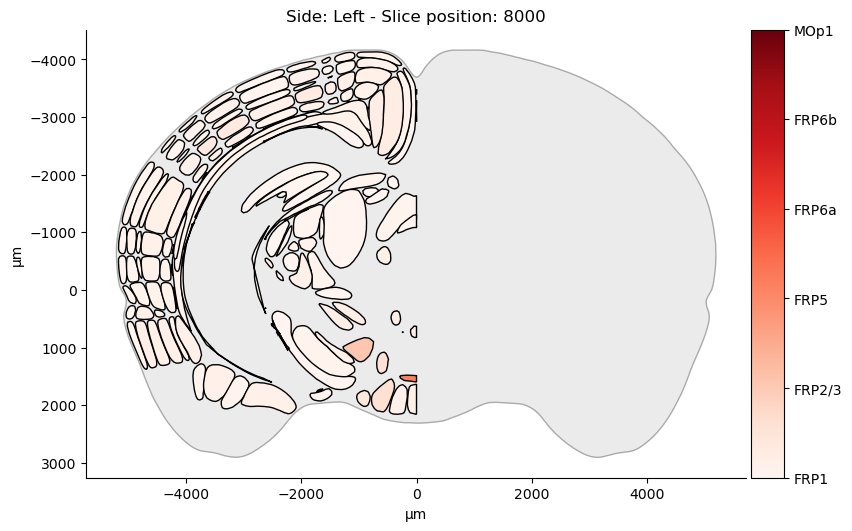

The region RSPd4 is in the onthology but does not have a corresponding volume in the atlas being used: allen_mouse_25um. Skipping


/home/gabri/mambaforge/envs/brainrender-env/lib/python3.9/site-packages/brainglobe_heatmap/heatmaps.py:237: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([r.strip() for r in self.values.keys()])


<Figure size 200x200 with 0 Axes>

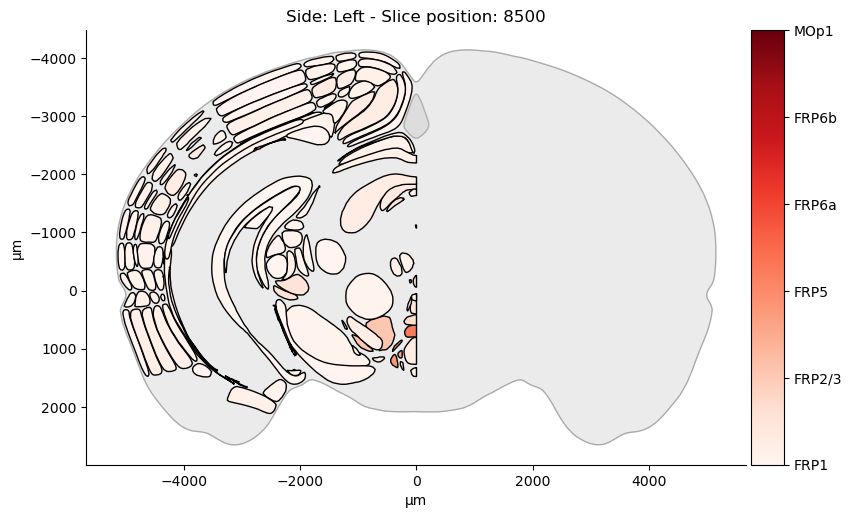

In [5]:
# Select an atlas
bg_atlas = BrainGlobeAtlas("allen_mouse_50um", check_latest=False)

df = pd.read_csv(csv_file)
# Take the ROI only from one side
df = df[df["Side"] == side]

#Attention:Here we want to show all the regions
#BUT we have to use only the ROI that are presnet in the atlas otherwise we will have errors
df = df[df['Region'].isin(bg_atlas.lookup_df["acronym"].to_list())] #take only regions that are in the atlas

# Create the dictionary --> NB take the name withounf left or right
cell_density_data = dict(zip(df['Region'], df['Cell Density']))

print(cell_density_data)
start_cut = 8000 #from olfacotry bulb
end_cut = 9000 #to myelenchephalon
step = 500

# Iterate over cuts range
for cut in range(start_cut, end_cut, step):

    plt.figure(figsize=(2,2))  # Create a new figure each iteration
    
    # Create Heatmap object
    f = bgh.Heatmap(
        cell_density_data,
        position=cut,
        orientation="frontal",  # Adjust orientation as needed
        title=f"Side: {side} - Slice position: {cut}",
        vmin=0,
        vmax=0.01,
        cmap='Reds',
        atlas_name="allen_mouse_25um",
        format='2D', 
        hemisphere="right",
        label_regions=True
    )
    
    # Plot the heatmap
    fig = f.plot(show_legend=False, xlabel='µm', ylabel='µm', hide_axes=False)
    
    # Save the figure as PDF
    #fig.savefig(os.path.join(image_dir, f'{side}-{cut}.pdf'), dpi=100)
    



/home/gabri/mambaforge/envs/brainrender-env/lib/python3.9/site-packages/brainglobe_heatmap/heatmaps.py:237: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([r.strip() for r in self.values.keys()])


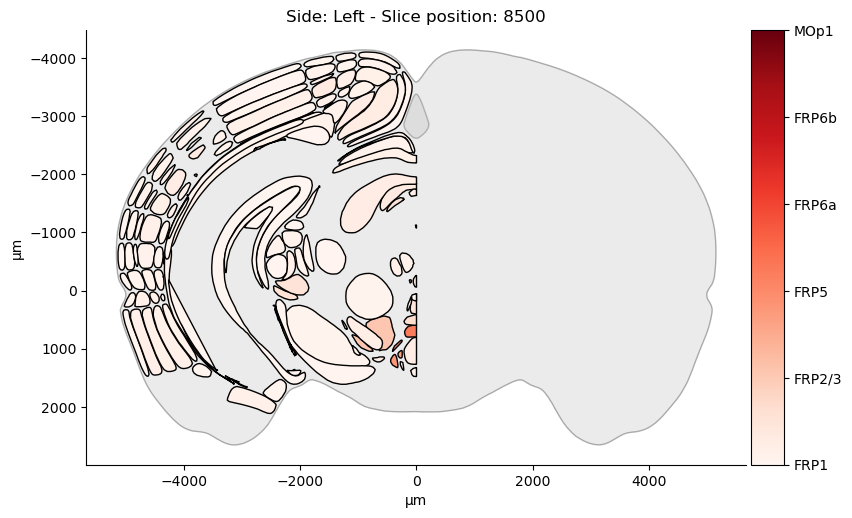

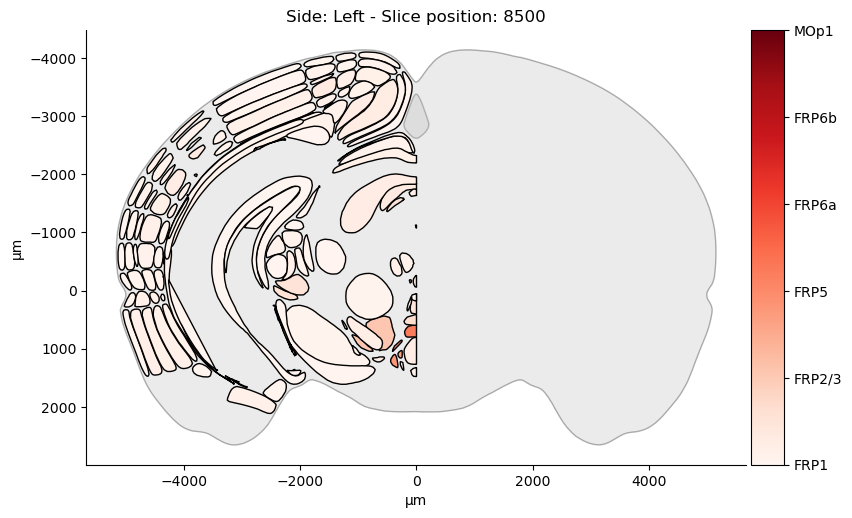

In [8]:
# Necessary for running in jupyternotebook
import vedo
vedo.settings.default_backend= 'vtk'

f.show()

# 3D HeatMap
**ATTENTION**: it cannot handle too many regions!!!, so it is only possbile to plot a subset of them.

### All hemipshere equal

In [1]:
# Necessary for running in jupyter
import vedo
vedo.settings.default_backend= 'vtk'

df = pd.read_csv(csv_file)
# Take the ROI only from one side
df = df[df["Side"] == side]
# Take only first most dense regions
df = df.sort_values(by='Cell Density', ascending=False)
df = df.iloc[:n_roi_displayed, :] #take first elements
#Attention:Here we want to show all the regions
#BUT we have to use only the ROI that are presnet in the atlas otherwise we will have errors
df = df[df['Region'].isin(bg_atlas.lookup_df["acronym"].to_list())] #take only regions that are in the atlas

# Create the dictionary --> NB take the name withounf left or right
cell_density_data = dict(zip(df['Region'], df['Cell Density']))

bgh.Heatmap(
    cell_density_data,
    position=(
        None #None is centered in the brain
    ),
    orientation="sagittal",  # 'frontal' or 'sagittal', or 'horizontal' or a tuple (x,y,z)
    title="horizontal view",
    vmin=0,
    vmax=0.01,
    cmap='Reds',
    format="3D",
    thickness = 10000
).show()

NameError: name 'pd' is not defined

### Two Hemispheres different -  DIFFICULT WAY
**ATTENTION**: To correctly execute this part of the process, you must modify the `render()` function in the `heatmap.py` script. This file is located in the `brainrender-env/lib/python3.9/site-packages/brainglobe_heatmap` directory of your virtual environment.

For a visual guide on how to perform this modification, refer to the image below:

<div style="text-align: center;">
    <img src="/home/gabri/Desktop/intership_neurorestore_pipeline/assets/images/modify_render_heatmap_script.png" alt="Modify Render Function" width="500"/>
</div>



In [ ]:
# Firstly we have to decide which region to plot
# We decide to take the first n_roi_displayed more dense independenly of left or right, and then take also the contalater part

df = pd.read_csv(csv_file)

df_sorted = df.sort_values(by='Cell Density', ascending=False)
df_sorted_max = df_sorted.iloc[:n_roi_displayed, :] #take first elements

name_max_regions = df_sorted_max["Region"].to_list()

print(name_max_regions)

['mfb', 'VTN', 'VI', 'Su3', 'CUN', 'LDT', 'DR', 'MMd', 'PCG', 'AT', 'IF', 'LDT', 'PN', 'PIL', 'gVIIn', 'pm', 'DR', 'IF', 'Pa4', 'MMd']


In [ ]:
#####################################
### Necessary for running in jupyter
import vedo
vedo.settings.default_backend= 'vtk'

#####################################
### Prepare data to show --> 2 of them: one left, one right

df = pd.read_csv(csv_file)
# Take the ROI only from one side
df = df[df["Side"] == "Left"]
# Take only first most dense regions
df = df[df["Region"].isin(name_max_regions)]
# Only the ROI that are presnet in the atlas otherwise we will have errors
df = df[df['Region'].isin(bg_atlas.lookup_df["acronym"].to_list())] #take only regions that are in the atlas
# Create the dictionary --> NB take the name withounf left or right
cell_density_data = dict(zip(df['Region'], df['Cell Density']))
cell_density_data_left = cell_density_data

df = pd.read_csv(csv_file)
# Take the ROI only from one side
df = df[df["Side"] == "Right"]
# Take only first most dense regions
df = df[df["Region"].isin(name_max_regions)]
# Only the ROI that are presnet in the atlas otherwise we will have errors
df = df[df['Region'].isin(bg_atlas.lookup_df["acronym"].to_list())] #take only regions that are in the atlas
# Create the dictionary --> NB take the name withounf left or right
cell_density_data = dict(zip(df['Region'], df['Cell Density']))
cell_density_data_right = cell_density_data

print(cell_density_data_left)
print(cell_density_data_right)


#####################################
### prepare 2 actors

sagittal_middle = 5700

left_hm = bgh.Heatmap(
    cell_density_data_left,
    position=(
        sagittal_middle #None is centered in the brain
    ),
    orientation="sagittal",  # 'frontal' or 'sagittal', or 'horizontal' or a tuple (x,y,z)
    title="sagittal left",
    vmin=0,
    vmax=0.01,
    cmap='Reds',
    format="3D",
    thickness = 10000 # in order to see every region
)

right_hm = bgh.Heatmap(
    cell_density_data_right,
    position=(
        8000,
        5000,
        sagittal_middle
    ),
    orientation=(0,0,-1),  # 'frontal' or 'sagittal', or 'horizontal' or a tuple (x,y,z)
        #NB to change the point of view using a tuple, tu MUST chnage the heatmpas.py inside the pacakce "brainglobe_heatmap"
    title="sagittal right",
    vmin=0,
    vmax=0.01,
    cmap='Reds',
    format="3D",
    thickness = 10000 # in order to see every region
)

scene_left = left_hm.show()
scene_right = right_hm.show()

def extract_brain_actors(scene: Scene):
    # Function to extract actors from the heatmap scene
    return [actor for actor in scene.get_actors(br_class="brain region")]

# Create a new Scene for integration
new_scene = Scene(title="Combined Brain Visualization")

# Add the extracted brain actors to the new scene
for actor in extract_brain_actors(scene_left):
    new_scene.add(actor)
for actor in extract_brain_actors(scene_right):
    new_scene.add(actor)

# Render the new scene
new_scene.render()





{'PIL': 0.0010510530237481, 'MMd': 0.0043683729796274, 'PN': 0.0041010451969356, 'Su3': 0.0014067335646628, 'CUN': 0.0011996284497383, 'Pa4': 0.0016606973821873, 'VTN': 0.0031474698141364, 'AT': 0.0034706583653464, 'IF': 0.0044176676238279, 'DR': 0.0044524537553373, 'PCG': 0.0038510489600164, 'LDT': 0.005768558867203, 'VI': 0.0036721884666247, 'gVIIn': 0.0016057782829507, 'mfb': 0.0011892146448107, 'pm': 0.003140800334088}
{'PIL': 0.0049753925377404, 'MMd': 0.0059847232065516, 'PN': 0.0053520513039112, 'Su3': 0.0089835728952772, 'CUN': 0.0081535399534851, 'Pa4': 0.0043882222282417, 'VTN': 0.0097714100755452, 'AT': 0.0058738868149335, 'IF': 0.0058395932002866, 'DR': 0.0067155854201417, 'PCG': 0.0059275339849265, 'LDT': 0.0081345507042349, 'VI': 0.0091580076530203, 'gVIIn': 0.0048593157328602, 'mfb': 0.013460350991524, 'pm': 0.004469972303701}


## Check where yuo are cutting

In [ ]:
"""
    This example shows how to use the `plan` functionality to visualize the
    position of the planes used to 'slice' the brain for heatmap visualization.
"""

import brainglobe_heatmap as bgh

regions = [
    "TH",
    "RSP",
    "AI",
    "SS",
    "MO",
    "PVZ",
    "LZ",
    "VIS",
    "AUD",
    "RHP",
    "STR",
    "CB",
    "FRP",
    "HIP",
    "PA",
]


planner = bgh.plan(
    regions,
    position=(
        8000,
        5000,
        5700,
    ),
    orientation=(0,0,-1),  # or 'sagittal', or 'horizontal' or a tuple (x,y,z)
    thickness=2000,  # thickness of the slices used for rendering (in microns)
    arrow_scale=750,
)
planner.show()


╭─ Plane 0 ─────────────────────────────╮
│                                       │
│   center point:  (8000, 5000, -5700)  │
│           norm:  (0.0, 0.0, -1.0)     │
│              u:  (-1.0, 0.0, 0.0)     │
│              v:  (0.0, 1.0, 0.0)      │
╰───────────────────────────────────────╯

╭─ Plane 1 ─────────────────────────────╮
│                                       │
│   center point:  (8000, 5000, -7700)  │
│           norm:  (0.0, 0.0, 1.0)      │
│              u:  (1.0, 0.0, 0.0)      │
│              v:  (0.0, 1.0, 0.0)      │
╰───────────────────────────────────────╯

A `brainrender.scene.Scene` with 19 actors.

# Two Hemispheres different -  EASY WAY


In [1]:
import pandas as pd
import numpy as np
import glob
from brainrender import Scene
from brainrender.actors import Points
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from brainglobe_atlasapi import BrainGlobeAtlas
from brainglobe_atlasapi import show_atlases
import brainglobe_heatmap as bgh
from brainrender import Scene, actors, cameras, settings


# MANDATORY INPUTS
csv_file = "/run/user/1000/gvfs/smb-share:server=upcourtinenas,share=cervical/CERVICAL_ID/Connectome_analysis/Final_dataset/DR/Uninjured/602/_Measurements/whole_brain.csv"
image_dir = "" #folder where to save images
side = "Left" #right
n_roi_displayed = 20 #first most dense roi to display
verbose = True


#####################################
### Necessary for running in jupyter
import vedo
vedo.settings.default_backend= 'vtk'

#####################################
### Decide which region to plot

# We decide to take the first n_roi_displayed more dense independenly of left or right, and then take also the contalater part
df = pd.read_csv(csv_file)
df_sorted = df.sort_values(by='Cell Density', ascending=False)
df_sorted_max = df_sorted.iloc[:n_roi_displayed, :] #take first elements
name_max_regions = df_sorted_max["Region"].to_list()
print(name_max_regions)

#####################################
### choose Atlas
bg_atlas = BrainGlobeAtlas("allen_mouse_25um", check_latest=False)

#####################################
### Ectract the density of the regions decided in the cell above

df = pd.read_csv(csv_file)
# Take the ROI only from one side
df = df[df["Side"] == "Left"]
# Take only first most dense regions
df = df[df["Region"].isin(name_max_regions)]
# Only the ROI that are presnet in the atlas otherwise we will have errors
df = df[df['Region'].isin(bg_atlas.lookup_df["acronym"].to_list())] #take only regions that are in the atlas
# Create the dictionary --> NB take the name withounf left or right
cell_density_data = dict(zip(df['Region'], df['Cell Density']))
cell_density_data_left = cell_density_data

df = pd.read_csv(csv_file)
# Take the ROI only from one side
df = df[df["Side"] == "Right"]
# Take only first most dense regions
df = df[df["Region"].isin(name_max_regions)]
# Only the ROI that are presnet in the atlas otherwise we will have errors
df = df[df['Region'].isin(bg_atlas.lookup_df["acronym"].to_list())] #take only regions that are in the atlas
# Create the dictionary --> NB take the name withounf left or right
cell_density_data = dict(zip(df['Region'], df['Cell Density']))
cell_density_data_right = cell_density_data

print(cell_density_data_left)
print(cell_density_data_right)

#####################################
### create colors

# Normalize cell density values to range [0, 1]
def normalize(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

array_left = np.array(list(cell_density_data_left.values()))
array_right = np.array(list(cell_density_data_right.values()))
all_densities = np.concatenate((array_left, array_right))
min_density = all_densities.min()
max_density = all_densities.max()
normalized_densities_left = {region: normalize(density, min_density, max_density) for region, density in cell_density_data_left.items()}
normalized_densities_right = {region: normalize(density, min_density, max_density) for region, density in cell_density_data_right.items()}

# Create a colormap using matplotlib
cmap = plt.get_cmap('Reds')  # You can choose other colormaps like 'plasma', 'inferno', etc.
norm = mcolors.Normalize(vmin=0, vmax=1)

# Map normalized densities to colors
colors_left = {region: mcolors.to_hex(cmap(norm(density))) for region, density in normalized_densities_left.items()}
colors_right = {region: mcolors.to_hex(cmap(norm(density))) for region, density in normalized_densities_right.items()}

print(colors_left)
print(colors_right)

# Colors in rgb triplets
#rgb_colors = {region: mcolors.to_rgb(cmap(norm(density))) for region, density in normalized_densities.items()}
#print(rgb_colors)

############################################
### chnage parmaters rendering

settings.SHADER_STYLE = "plastic"  # Options: 'plastic', 'metallic', 'shiny', 'matte'
settings.BACKGROUND_COLOR = "black"  # Any color name or RGB hex code
settings.ROOT_ALPHA = 0.4  # Value between 0 (fully transparent) and 1 (fully opaque)
settings.SHOW_AXES = False  # True or False
#settings.WINDOW_SIZE = [800, 600]  # Width, Height in pixels
#settings.CAMERA = {
    #"pos": (0, 0, 0),
    #"viewup": (0, -1, 0),
    #"clippingRange": (2000, 10000),
    #"focalPoint": (0, 0, 0),
    #"distance": 5000 }
settings.SHOW_LEGEND = True  # True or False
settings.SHOW_SCALEBAR = True  # True or False

#brainrender.reset_defaults()

custom_camera = {
    "pos": (0, 4000, -5700), #(x,up/doen,left/rught)
    "viewup": (0, -1, 0),
    "clipping_range": (2000, 10000)
}

############################################
### render scene

# Display the Allen Brain mouse atlas.
scene = Scene(atlas_name="allen_mouse_50um", title="Cells Density in differnt brain regions",)

# Create 2 differt scenes
scene_left = Scene(atlas_name="allen_mouse_50um", title="Cells Density in differnt brain regions")
scene_right = Scene(atlas_name="allen_mouse_50um", title="Cells Density in differnt brain regions")

# Add each brain region with the corresponding color
for region, color in colors_right.items():
    scene_right.add_brain_region(region, alpha=1, color=color, hemisphere="right")
for region, color in colors_left.items():
    scene_left.add_brain_region(region, alpha=1, color=color, hemisphere="left")

# Create a new Scene for integration
new_scene = Scene(title="Combined Brain Visualization")

# Add the extracted brain actors to the new scene
def extract_brain_actors(scene: Scene):
    # Function to extract actors from the heatmap scene
    return [actor for actor in scene.get_actors(br_class="brain region")]
for actor in extract_brain_actors(scene_left):
    new_scene.add(actor)
for actor in extract_brain_actors(scene_right):
    new_scene.add(actor)

# Render the new scene
new_scene.render(camera=custom_camera)



['mfb', 'VTN', 'VI', 'Su3', 'CUN', 'LDT', 'DR', 'MMd', 'PCG', 'AT', 'IF', 'LDT', 'PN', 'PIL', 'gVIIn', 'pm', 'DR', 'IF', 'Pa4', 'MMd']
{'PIL': 0.0010510530237481, 'MMd': 0.0043683729796274, 'PN': 0.0041010451969356, 'Su3': 0.0014067335646628, 'CUN': 0.0011996284497383, 'Pa4': 0.0016606973821873, 'VTN': 0.0031474698141364, 'AT': 0.0034706583653464, 'IF': 0.0044176676238279, 'DR': 0.0044524537553373, 'PCG': 0.0038510489600164, 'LDT': 0.005768558867203, 'VI': 0.0036721884666247, 'gVIIn': 0.0016057782829507, 'mfb': 0.0011892146448107, 'pm': 0.003140800334088}
{'PIL': 0.0049753925377404, 'MMd': 0.0059847232065516, 'PN': 0.0053520513039112, 'Su3': 0.0089835728952772, 'CUN': 0.0081535399534851, 'Pa4': 0.0043882222282417, 'VTN': 0.0097714100755452, 'AT': 0.0058738868149335, 'IF': 0.0058395932002866, 'DR': 0.0067155854201417, 'PCG': 0.0059275339849265, 'LDT': 0.0081345507042349, 'VI': 0.0091580076530203, 'gVIIn': 0.0048593157328602, 'mfb': 0.013460350991524, 'pm': 0.004469972303701}
{'PIL': '#f

### Make a slice video

In [11]:
from brainrender.video import VideoMaker

s = new_scene

# Make a custom make frame function
def make_frame(s, frame_number, *args, **kwargs):

    x_cut = 100*frame_number
    offset = 4000
    
    #print(x_cut)
    #print(s.camera)

    plane = s.atlas.get_plane(pos=(x_cut + offset,0,0), norm=(1, 0, 0))
    s.slice(plane, actors=extract_brain_actors(s))


# Now make a video with our custom function
vm = VideoMaker(s, "/home/gabri/Downloads/temp", "vid1", make_frame_func=make_frame)
vm.make_video(duration=1, fps=5)



Saving video in /home/gabri/Downloads/temp

📽  Video file vid1 is open... 

Output()

Saving video

Saved video at: /home/gabri/Downloads/temp/vid1.mp4

'/home/gabri/Downloads/temp/vid1.mp4'

# Tests

In [3]:
from brainrender import camera

s= new_scene

custom_camera = {
    "pos": (0, 4000, -5700), #(x,up/doen,left/rught)
    "viewup": (0, -1, 0),
    "clipping_range": (2000, 10000)
}

print(camera.get_camera_params(s))
camera.set_camera(s, custom_camera)
print(camera.get_camera_params(s))

plane = s.atlas.get_plane(pos=(5000,0,0), norm=(1, 0, 0))

s.slice(plane, actors=extract_brain_actors(s))

print(camera.get_camera_params(s))
camera.set_camera(s, custom_camera)
print(camera.get_camera_params(s))

s.render(custom_camera)

{'pos': (-13934, -5041, 10160), 'focal_point': (9096, 3849, -5688), 'viewup': (0, -1, 0), 'distance': 29335, 'clipping_range': (14809, 47692)}
{'pos': (0, 4000, -5700), 'focal_point': (9096, 3849, -5688), 'viewup': (0, -1, 0), 'distance': 9098, 'clipping_range': (2000, 10000)}
{'pos': (0, 4000, -5700), 'focal_point': (9096, 3849, -5688), 'viewup': (0, -1, 0), 'distance': 9098, 'clipping_range': (2000, 10000)}
{'pos': (0, 4000, -5700), 'focal_point': (9096, 3849, -5688), 'viewup': (0, -1, 0), 'distance': 9098, 'clipping_range': (2000, 10000)}


In [5]:
s = Scene()

# Define custom camera settings (this is an example; adjust based on your needs)
def custom_camera(scene):
    # Example of setting a camera view, adjust parameters as needed
    scene.camera.position = [100, 100, 100]  # Camera position in 3D space
    scene.camera.focal_point = [0, 0, 0]  # Point the camera is looking at
    scene.camera.up_vector = [0, 0, 1]  # Up direction for the came